In [ ]:
from google.colab import files
uploaded = files.upload()

Saving natural_disasters_2024.csv to natural_disasters_2024 (1).csv


In [ ]:
!pip install matplotlib seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('natural_disasters_2024.csv')

In [ ]:
print(data.head())
print(data.describe())


   Disaster_ID Disaster_Type   Location  Magnitude                Date  \
0            1      Wildfire     Brazil   6.267393 2024-01-01 00:00:00   
1            2     Hurricane  Indonesia   6.649358 2024-01-01 01:00:00   
2            3       Tornado      China   9.724366 2024-01-01 02:00:00   
3            4         Flood      India   1.702505 2024-01-01 03:00:00   
4            5         Flood     Brazil   7.917748 2024-01-01 04:00:00   

   Fatalities  Economic_Loss($)  Year    Month  
0        9706      6.509790e+08  2024  January  
1        2233      5.538357e+08  2024  January  
2         478      6.910998e+07  2024  January  
3        2867      8.474880e+08  2024  January  
4         776      6.449297e+08  2024  January  
       Disaster_ID     Magnitude                 Date    Fatalities  \
count  10000.00000  10000.000000                10000  10000.000000   
mean    5000.50000      5.559173  2024-07-27 07:30:00   4984.928900   
min        1.00000      1.000656  2024-01-01 00:

In [ ]:
# Tarih ve yıl sütunlarını düzenleme
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year

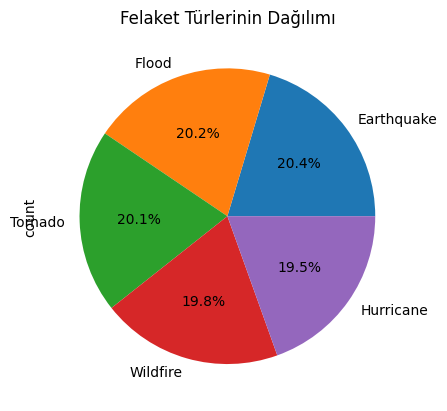

In [ ]:
# Felaket türlerinin dağılımı
disaster_type_counts = data["Disaster_Type"].value_counts()
disaster_type_counts.plot(kind="pie", autopct="%1.1f%%", title="Felaket Türlerinin Dağılımı")
plt.show()

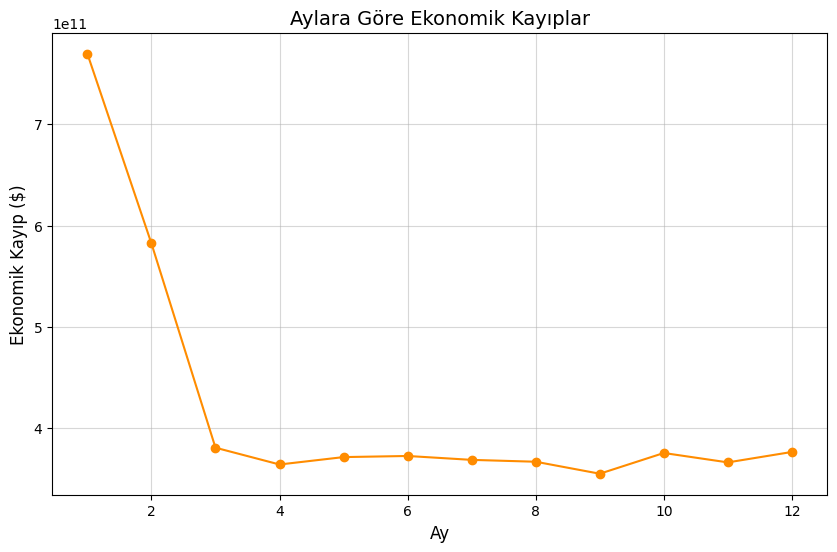

In [ ]:
# Aylara göre toplam ekonomik kayıplar
data["Month"] = pd.to_datetime(data["Date"]).dt.month
annual_loss = data.groupby("Month")["Economic_Loss($)"].sum()

plt.figure(figsize=(10, 6))
annual_loss.plot(kind="line", marker="o", color="darkorange")
plt.title("Aylara Göre Ekonomik Kayıplar", fontsize=14)
plt.xlabel("Ay", fontsize=12)
plt.ylabel("Ekonomik Kayıp ($)", fontsize=12)
plt.grid(alpha=0.5)
plt.show()


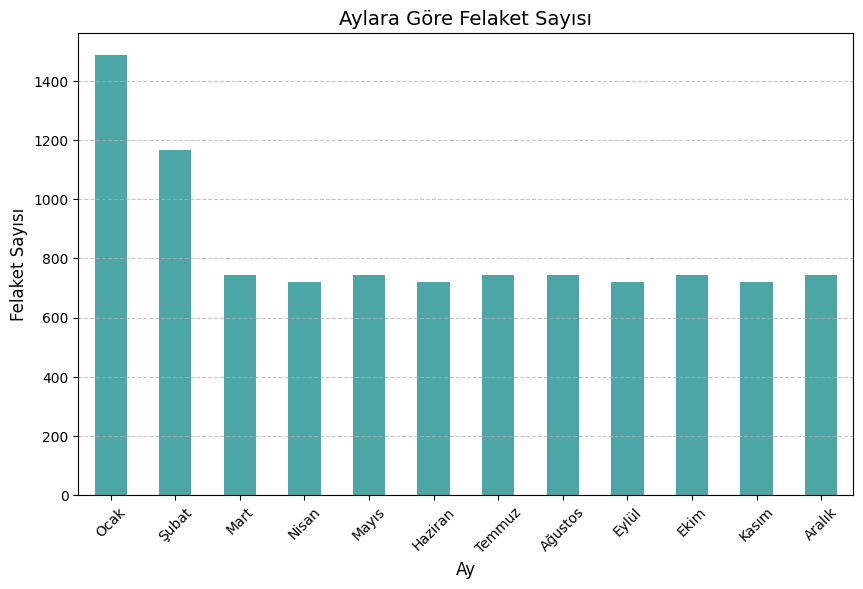

In [ ]:
# Aylara göre felaket sayısı
monthly_disasters = data.groupby("Month").size()

plt.figure(figsize=(10, 6))
monthly_disasters.plot(kind="bar", color="teal", alpha=0.7)
plt.title("Aylara Göre Felaket Sayısı", fontsize=14)
plt.xlabel("Ay", fontsize=12)
plt.ylabel("Felaket Sayısı", fontsize=12)
plt.xticks(ticks=range(12), labels=["Ocak", "Şubat", "Mart", "Nisan", "Mayıs", "Haziran", "Temmuz", "Ağustos", "Eylül", "Ekim", "Kasım", "Aralık"], rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

<ipython-input-38-db18fb6280f3>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Fatalities', data=fatalities_by_month, palette="viridis")


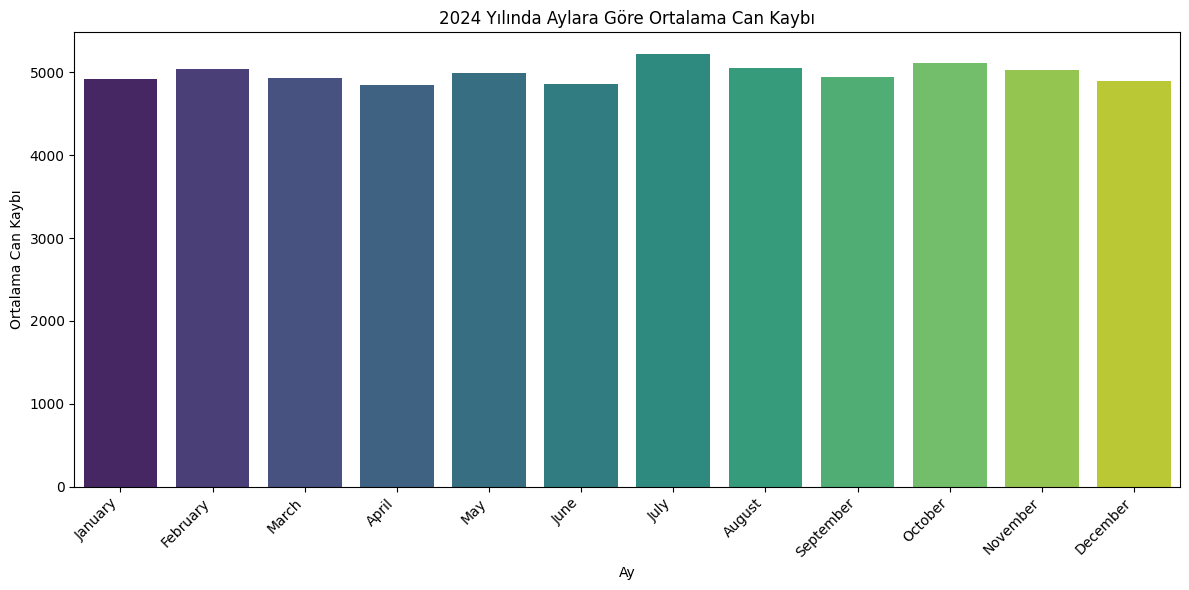

In [ ]:
# 2024 Yılındaki Aylara Göre Ortalama Can Kaybı

# Tarih sütunundan ay bilgisini çıkarın
data['Month'] = pd.to_datetime(data['Date']).dt.month_name()

# Aylara göre ortalama can kaybını hesaplayın2
fatalities_by_month = data.groupby('Month')['Fatalities'].mean().reset_index()

# Ayları sıralamak için bir sözlük kullanın
month_order = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
fatalities_by_month['Month_Num'] = fatalities_by_month['Month'].map(month_order)
fatalities_by_month = fatalities_by_month.sort_values('Month_Num')


# Çubuk grafiğini oluşturun
plt.figure(figsize=(12, 6))  # Genişliği artırın
sns.barplot(x='Month', y='Fatalities', data=fatalities_by_month, palette="viridis")
plt.title("2024 Yılında Aylara Göre Ortalama Can Kaybı")
plt.xlabel("Ay")
plt.ylabel("Ortalama Can Kaybı")
plt.xticks(rotation=45, ha='right')  # X eksenindeki etiketleri döndürün
plt.tight_layout()  # Etiketlerin kesilmesini önleyin
plt.show()

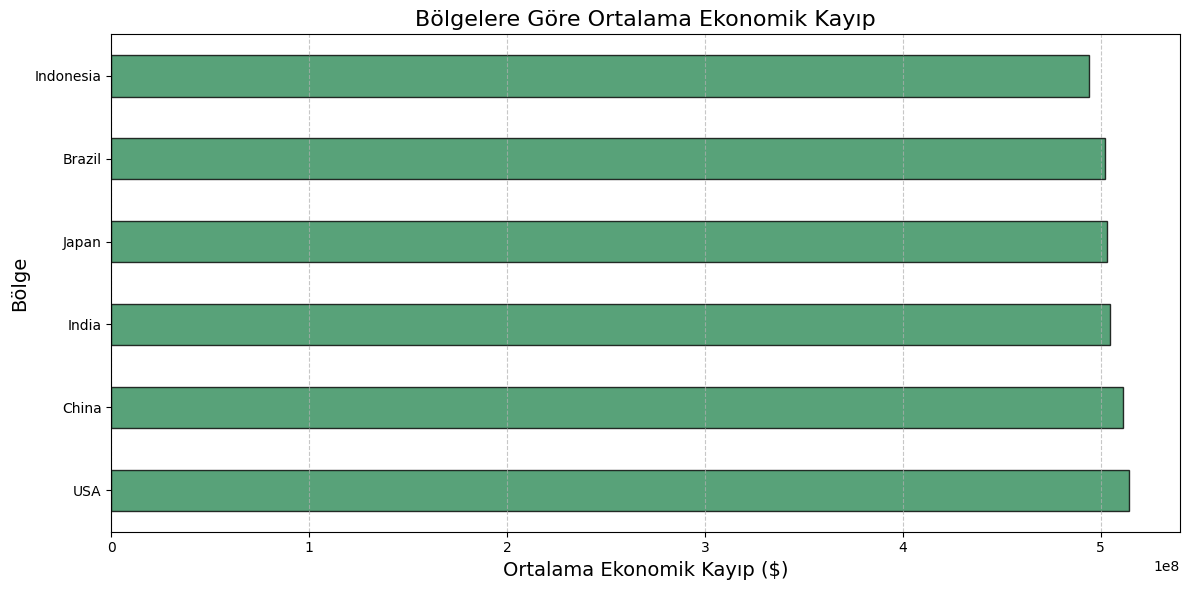

In [ ]:
# Bölgelere göre ortalama ekonomik kayıp
avg_loss_by_region = data.groupby("Location")["Economic_Loss($)"].mean().nlargest(10)

plt.figure(figsize=(12, 6))
avg_loss_by_region.plot(kind="barh", color="seagreen", alpha=0.8, edgecolor="black")
plt.title("Bölgelere Göre Ortalama Ekonomik Kayıp", fontsize=16)
plt.xlabel("Ortalama Ekonomik Kayıp ($)", fontsize=14)
plt.ylabel("Bölge", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

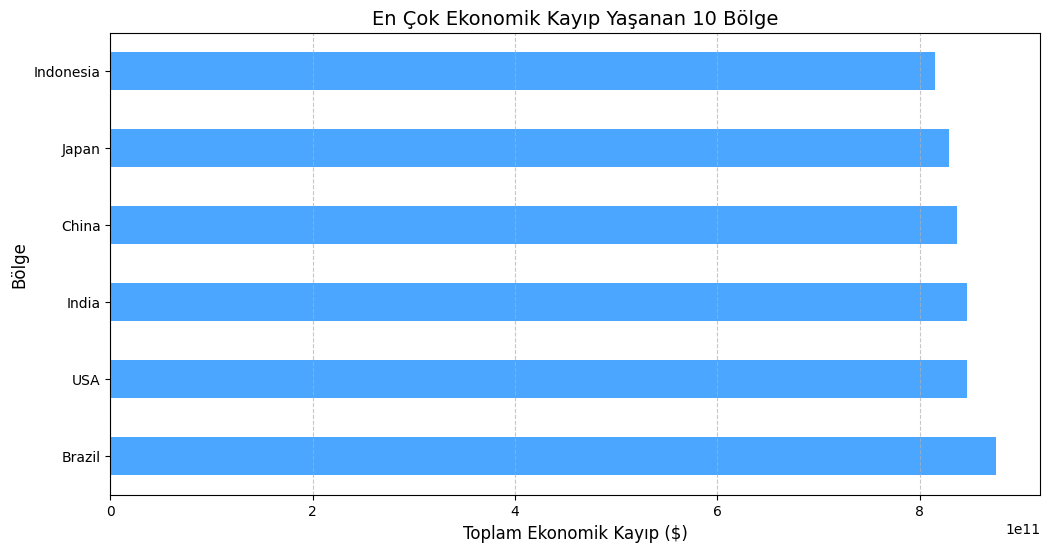

In [ ]:
# Bölgeye göre ekonomik kayıplar
region_loss = data.groupby("Location")["Economic_Loss($)"].sum().nlargest(10)

plt.figure(figsize=(12, 6))
region_loss.plot(kind="barh", color="dodgerblue", alpha=0.8)
plt.title("En Çok Ekonomik Kayıp Yaşanan 10 Bölge", fontsize=14)
plt.xlabel("Toplam Ekonomik Kayıp ($)", fontsize=12)
plt.ylabel("Bölge", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

<ipython-input-41-6dabc7e5f6a4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earthquake_df['Magnitude_Range'] = pd.cut(earthquake_df['Magnitude'], bins=bins, labels=labels)
<ipython-input-41-6dabc7e5f6a4>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = earthquake_df.groupby('Magnitude_Range')['Economic_Loss($)'].sum().reset_index()
<ipython-input-41-6dabc7e5f6a4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same ef

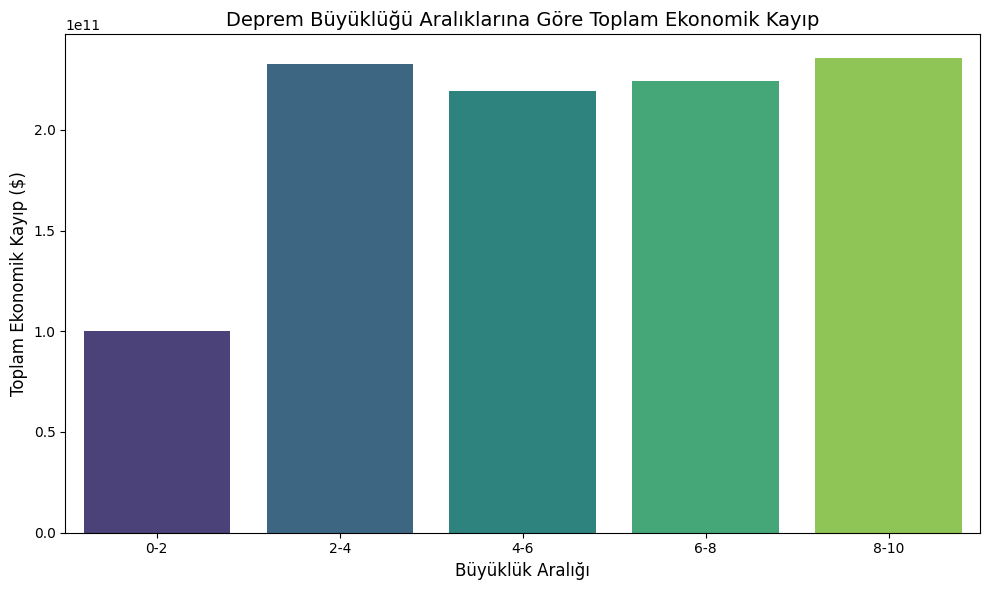

In [ ]:
earthquake_df = data[data['Disaster_Type'] == 'Earthquake']

# Büyüklük aralıklarını oluşturun ve ekonomik kayıpları gruplayın
bins = [0, 2, 4, 6, 8, 10]  # Büyüklük aralıkları
labels = ['0-2', '2-4', '4-6', '6-8', '8-10']  # Aralık etiketleri
earthquake_df['Magnitude_Range'] = pd.cut(earthquake_df['Magnitude'], bins=bins, labels=labels)
grouped_df = earthquake_df.groupby('Magnitude_Range')['Economic_Loss($)'].sum().reset_index()

# Çubuk grafiğini oluşturun
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Magnitude_Range',
    y='Economic_Loss($)',
    data=grouped_df,
    palette="viridis"
)

# Başlık ve eksen etiketlerini ekleyin
title = "Deprem Büyüklüğü Aralıklarına Göre Toplam Ekonomik Kayıp"
plt.title(title, fontsize=14)
plt.xlabel("Büyüklük Aralığı", fontsize=12)
plt.ylabel("Toplam Ekonomik Kayıp ($)", fontsize=12)

# Düzeni ayarlayın ve grafiği gösterin
plt.tight_layout()
plt.show()

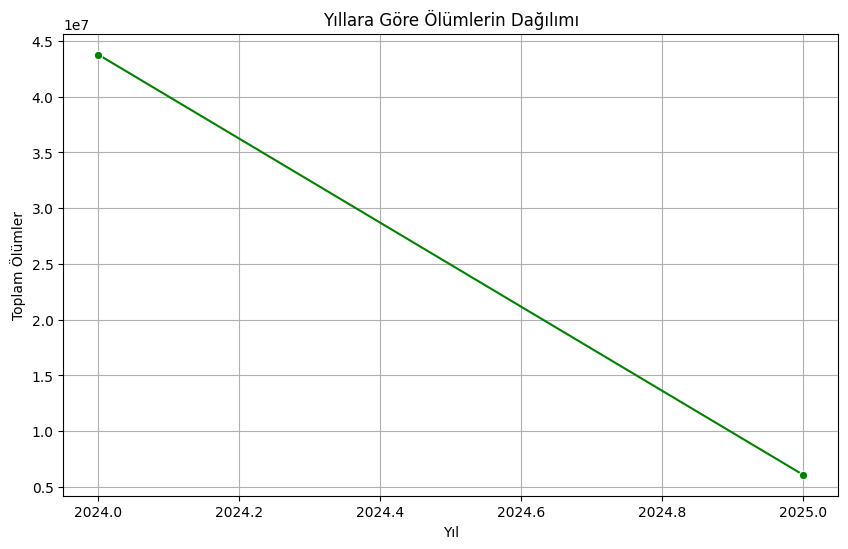

In [ ]:
# Yıllara göre ölümlerin dağılımı
yearly_fatalities = data.groupby('Year')['Fatalities'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_fatalities.index, y=yearly_fatalities.values, marker="o", color="g")
plt.title("Yıllara Göre Ölümlerin Dağılımı")
plt.xlabel("Yıl")
plt.ylabel("Toplam Ölümler")
plt.grid(True)
plt.show()

<ipython-input-76-160f34a37e75>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_locations.index, y=top_5_locations.values, palette="coolwarm")


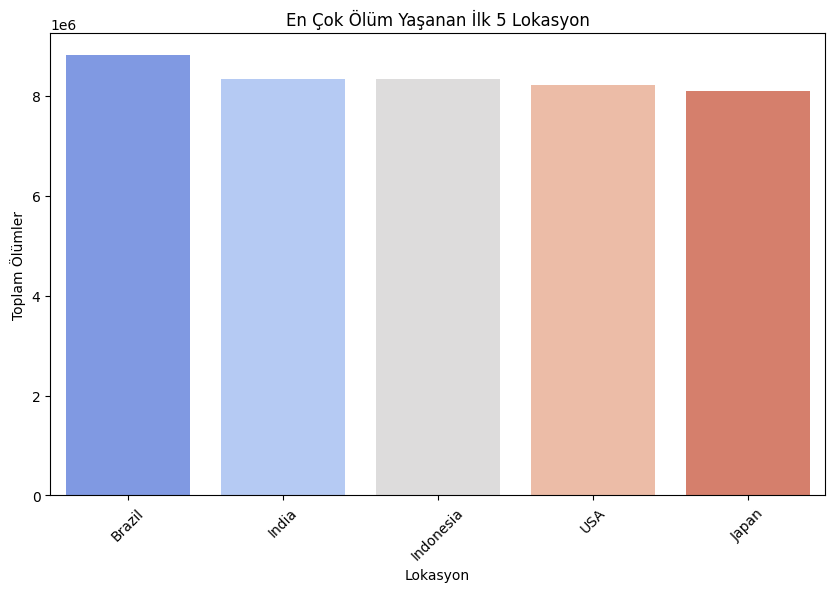

In [ ]:
# En çok ölüm yaşanan ilk 5 lokasyon
top_5_locations = query13.head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_locations.index, y=top_5_locations.values, palette="coolwarm")
plt.title("En Çok Ölüm Yaşanan İlk 5 Lokasyon")
plt.xlabel("Lokasyon")
plt.ylabel("Toplam Ölümler")
plt.xticks(rotation=45)
plt.show()

<ipython-input-77-2dcd602eb1e4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=query3.index, y=query3.values, palette="cool")


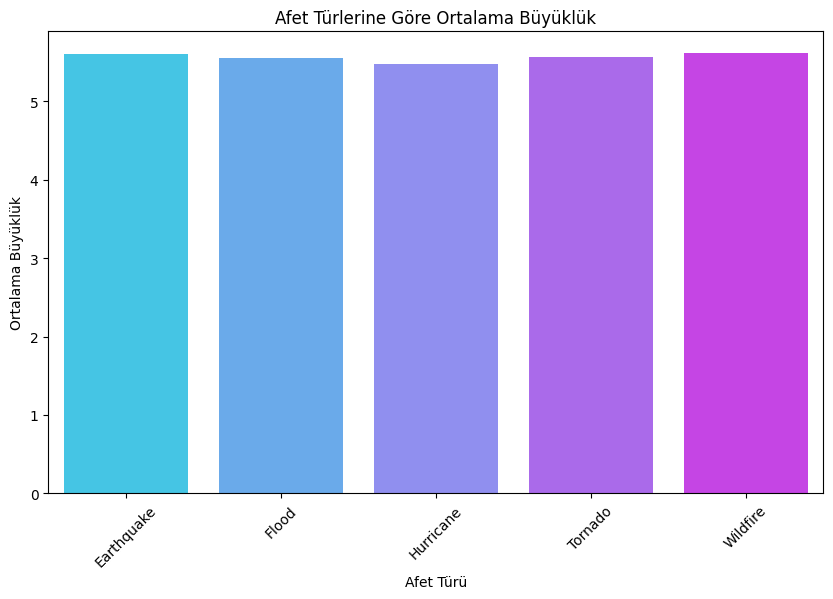

In [ ]:
# Ortalama büyüklük ve afet türü ilişkisi
plt.figure(figsize=(10, 6))
sns.barplot(x=query3.index, y=query3.values, palette="cool")
plt.title("Afet Türlerine Göre Ortalama Büyüklük")
plt.xlabel("Afet Türü")
plt.ylabel("Ortalama Büyüklük")
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Ortalama Ekonomik Kayıp ($)')

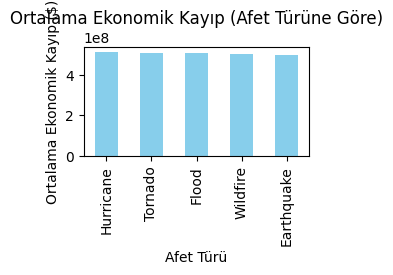

In [ ]:
# 1. Ortalama Ekonomik Kayıp (Afet Türüne Göre)
plt.subplot(3, 2, 1)
avg_economic_loss_by_disaster.plot(kind='bar', color='skyblue')
plt.title("Ortalama Ekonomik Kayıp (Afet Türüne Göre)")
plt.xlabel("Afet Türü")
plt.ylabel("Ortalama Ekonomik Kayıp ($)")

Text(0, 0.5, 'Afet Sayısı')

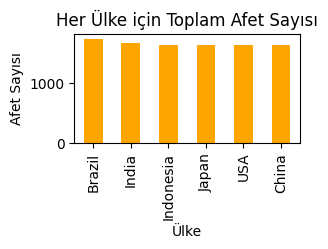

In [ ]:
# 2. Her Ülke için Toplam Afet Sayısı
plt.subplot(3, 2, 2)
disasters_per_country.head(10).plot(kind='bar', color='orange')
plt.title("Her Ülke için Toplam Afet Sayısı")
plt.xlabel("Ülke")
plt.ylabel("Afet Sayısı")

Text(0, 0.5, 'Ortalama Ölüm Sayısı')

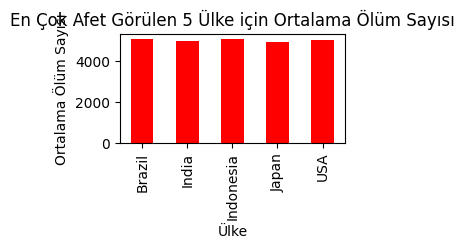

In [ ]:
# 4. En Çok Afet Görülen 5 Ülke için Ortalama Ölüm Sayısı
plt.subplot(3, 2, 4)
avg_fatalities_top_countries.plot(kind='bar', color='red')
plt.title("En Çok Afet Görülen 5 Ülke için Ortalama Ölüm Sayısı")
plt.xlabel("Ülke")
plt.ylabel("Ortalama Ölüm Sayısı")

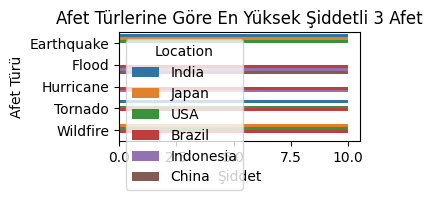

In [ ]:
# 5. Afet Türlerine Göre En Yüksek Şiddetli 3 Afet
plt.subplot(3, 2, 5)
sns.barplot(data=highest_magnitude_by_disaster, x='Magnitude', y='Disaster_Type', hue='Location')
plt.title("Afet Türlerine Göre En Yüksek Şiddetli 3 Afet")
plt.xlabel("Şiddet")
plt.ylabel("Afet Türü")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Afet\xa0Sayısı')

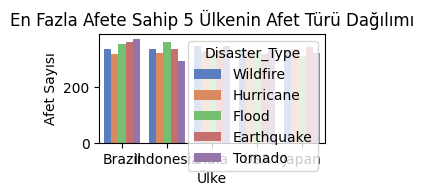

In [ ]:
#  En fazla afete sahip 5 ülkenin afet türü dağılımı
plt.subplot(3, 2, 5)
top_5_countries = data['Location'].value_counts().nlargest(5).index
top_countries_disasters = data[data['Location'].isin(top_5_countries)]
sns.countplot(data=top_countries_disasters, x='Location', hue='Disaster_Type', palette='muted')
plt.title("En Fazla Afete Sahip 5 Ülkenin Afet Türü Dağılımı")
plt.xlabel("Ülke")
plt.ylabel("Afet Sayısı")



In [ ]:
# Belirli bir ülkede en yüksek ekonomik kayıp
location = "Japan"  # Örnek ülke
max_loss_event = data[data["Location"] == location].nlargest(1, "Economic_Loss($)")
print(max_loss_event)

      Disaster_ID Disaster_Type Location  Magnitude                Date  \
8665         8666      Wildfire    Japan   2.255577 2024-12-27 01:00:00   

      Fatalities  Economic_Loss($)  Year     Month  
8665        8797      9.998528e+08  2024  December  


In [ ]:
#Bu kod en çok can kaybına sebep olan 10 depremi bulur
earthquake_df = earthquake_df.rename(columns={
    'Disaster_Type': 'Afet_Türü',
    'Magnitude': 'Büyüklük',
    'Date': 'Tarih',
    'Location': 'Yer',
    'Fatalities': 'Ölümler',
    'Economic_Loss($)': 'Ekonomik_Kayıp($)'
})

# En çok can kaybına neden olan 10 deprem olayını bulun
most_fatal_earthquakes = earthquake_df.nlargest(10, 'Ölümler')[['Büyüklük', 'Afet_Türü', 'Tarih', 'Yer', 'Ölümler']]

# Sonuçları yazdır
print("En çok can kaybına neden olan 10 deprem olayı:")
print(most_fatal_earthquakes)

En çok can kaybına neden olan 10 deprem olayı:
      Büyüklük   Afet_Türü               Tarih        Yer  Ölümler
5904  4.837283  Earthquake 2024-09-03 00:00:00      Japan     9999
1766  2.995466  Earthquake 2024-03-14 14:00:00      China     9979
5507  6.531264  Earthquake 2024-08-17 11:00:00      India     9964
7997  6.452341  Earthquake 2024-11-29 05:00:00  Indonesia     9962
5140  4.674497  Earthquake 2024-08-02 04:00:00     Brazil     9956
6401  1.832744  Earthquake 2024-09-23 17:00:00  Indonesia     9954
4781  6.334431  Earthquake 2024-07-18 05:00:00  Indonesia     9953
5477  5.838614  Earthquake 2024-08-16 05:00:00      Japan     9943
3619  2.688822  Earthquake 2024-05-30 19:00:00      Japan     9925
8584  5.808919  Earthquake 2024-12-23 16:00:00  Indonesia     9925


In [ ]:
# En büyük 5 afetin gerçekleştiği yeri ve bilgilerini bulun
most_fatal_disasters = data.nlargest(5, 'Fatalities')[['Disaster_Type', 'Location', 'Date', 'Fatalities', 'Magnitude']]

# Başlıkları Türkçe olarak değiştirilir
most_fatal_disasters = most_fatal_disasters.rename(columns={
    'Disaster_Type': 'Afet Türü',
    'Location': 'Yer',
    'Date': 'Tarih',
    'Fatalities': 'Ölü Sayısı',
    'Magnitude': 'Büyüklük'
})

# Sonuçları yazdırın
print("En büyük 5 afetin gerçekleştiği yer ve bilgileri:")
print(most_fatal_disasters)

En büyük 5 afetin gerçekleştiği yer ve bilgileri:
       Afet Türü    Yer               Tarih  Ölü Sayısı  Büyüklük
5904  Earthquake  Japan 2024-09-03 00:00:00        9999  4.837283
6690     Tornado  China 2024-10-05 18:00:00        9998  6.820952
4962    Wildfire  India 2024-07-25 18:00:00        9996  4.099883
7345    Wildfire  Japan 2024-11-02 01:00:00        9996  5.203924
3184     Tornado  China 2024-05-12 16:00:00        9994  4.718616


In [ ]:
# Büyüklüğü en fazla olan 10 olayı bulur
largest_magnitude_events = data.nlargest(10, 'Magnitude')[['Disaster_Type', 'Location', 'Date', 'Fatalities', 'Magnitude']]

# Başlıkları Türkçe olarak değiştirilir
largest_magnitude_events = largest_magnitude_events.rename(columns={
    'Disaster_Type': 'Afet Türü',
    'Location': 'Yer',
    'Date': 'Tarih',
    'Fatalities': 'Ölü Sayısı',
    'Magnitude': 'Büyüklük'
})

# Sonuçları yazdırın
print("Büyüklüğü en fazla olan 10 olay:")
print(largest_magnitude_events)

Büyüklüğü en fazla olan 10 olay:
       Afet Türü        Yer               Tarih  Ölü Sayısı  Büyüklük
1416   Hurricane  Indonesia 2024-02-29 00:00:00        6660  9.999671
8866     Tornado      India 2025-01-04 10:00:00        2818  9.998523
7566  Earthquake      India 2024-11-11 06:00:00        7582  9.997471
2197       Flood     Brazil 2024-04-01 13:00:00        9888  9.997423
7396  Earthquake      Japan 2024-11-04 04:00:00        1119  9.997283
1637     Tornado     Brazil 2024-03-09 05:00:00         418  9.997248
2006       Flood  Indonesia 2024-03-24 14:00:00        1547  9.996277
5861       Flood      China 2024-09-01 05:00:00        3362  9.994303
2573   Hurricane     Brazil 2024-04-17 05:00:00        6693  9.993792
4167   Hurricane     Brazil 2024-06-22 15:00:00        9695  9.993537


In [ ]:
# Depremleri filtreleyi
earthquake_data = data[data['Disaster_Type'] == 'Earthquake']

# Büyüklüğü en fazla olan 10 depremi bulun
largest_magnitude_earthquakes = earthquake_data.nlargest(10, 'Magnitude')[['Disaster_Type', 'Location', 'Date', 'Fatalities', 'Magnitude']]

# Başlıkları Türkçe olarak değiştirin
largest_magnitude_earthquakes = largest_magnitude_earthquakes.rename(columns={
    'Disaster_Type': 'Afet Türü',
    'Location': 'Yer',
    'Date': 'Tarih',
    'Fatalities': 'Ölü Sayısı',
    'Magnitude': 'Büyüklük'
})

# Sonuçları yazdırın
print("Büyüklüğü en fazla olan 10 deprem:")
print(largest_magnitude_earthquakes)

Büyüklüğü en fazla olan 10 deprem:
       Afet Türü        Yer               Tarih  Ölü Sayısı  Büyüklük
7566  Earthquake      India 2024-11-11 06:00:00        7582  9.997471
7396  Earthquake      Japan 2024-11-04 04:00:00        1119  9.997283
5466  Earthquake        USA 2024-08-15 18:00:00        8262  9.989271
742   Earthquake      Japan 2024-01-31 22:00:00        6745  9.986860
6652  Earthquake      India 2024-10-04 04:00:00        3076  9.981609
6437  Earthquake        USA 2024-09-25 05:00:00        1710  9.981578
8133  Earthquake      Japan 2024-12-04 21:00:00         867  9.977231
4029  Earthquake      China 2024-06-16 21:00:00        2002  9.976461
87    Earthquake  Indonesia 2024-01-04 15:00:00        1817  9.975996
5394  Earthquake      China 2024-08-12 18:00:00        4383  9.972227


In [ ]:
# Afet türlerinin sayısını hesaplayın
disaster_counts = data['Disaster_Type'].value_counts()

# En sık karşılaşılan 5 afet türünü seçin
top_5_disasters = disaster_counts.head(5)

# Başlıkları Türkçe olarak değiştirin
top_5_disasters = top_5_disasters.rename_axis('Afet Türü').reset_index(name='Sayı')


# Sonuçları yazdırın
print("En sık karşılaşılan 5 afet türü:")
print(top_5_disasters)

En sık karşılaşılan 5 afet türü:
    Afet Türü  Sayı
0  Earthquake  2036
1       Flood  2018
2     Tornado  2012
3    Wildfire  1982
4   Hurricane  1952


In [ ]:
# Şehirlerdeki afet sayısını hesaplayın
city_counts = data['Location'].value_counts()

# En çok afet görülen 10 şehri seçin
top_10_cities = city_counts.head(10)

# Başlıkları Türkçe olarak değiştirin
top_10_cities = top_10_cities.rename_axis('Şehir').reset_index(name='Afet Sayısı')

# Sonuçları yazdırın
print("En fazla doğal afet görülen 10 şehir:")
print(top_10_cities)

En fazla doğal afet görülen 10 şehir:
       Şehir  Afet Sayısı
0     Brazil         1743
1      India         1677
2  Indonesia         1649
3      Japan         1648
4        USA         1646
5      China         1637


In [ ]:
# Her afet türü için en sık görülen yeri bulun
most_frequent_locations = data.groupby('Disaster_Type')['Location'].agg(lambda x: x.value_counts().index[0])

# Başlıkları Türkçe olarak değiştirin
most_frequent_locations = most_frequent_locations.rename_axis('Afet Türü').reset_index(name='En Sık Görülen Yer')

# Sonuçları yazdırın
print("Afet türlerine göre en sık görülen yerler:")
print(most_frequent_locations)

Afet türlerine göre en sık görülen yerler:
    Afet Türü En Sık Görülen Yer
0  Earthquake             Brazil
1       Flood          Indonesia
2   Hurricane              Japan
3     Tornado             Brazil
4    Wildfire              India


In [ ]:
# En çok mali zarara uğratan 20 olayı bulun
top_20_costliest_events = data.nlargest(20, 'Economic_Loss($)')

# İlgili sütunları seçin ve başlıkları Türkçe olarak değiştirin
top_20_costliest_events = top_20_costliest_events[['Disaster_Type', 'Location', 'Magnitude', 'Economic_Loss($)']].rename(columns={
    'Disaster_Type': 'Afet Türü',
    'Location': 'Yer',
    'Magnitude': 'Büyüklük',
    'Economic_Loss($)': 'Ekonomik Zarar ($)'
})

# Sonuçları yazdırın
print("En çok mali zarara uğratan 20 olay:")
print(top_20_costliest_events)

En çok mali zarara uğratan 20 olay:
       Afet Türü        Yer  Büyüklük  Ekonomik Zarar ($)
8665    Wildfire      Japan  2.255577        9.998528e+08
4794       Flood        USA  9.339073        9.997109e+08
2928     Tornado  Indonesia  2.634051        9.994511e+08
8064  Earthquake     Brazil  5.479196        9.994302e+08
9480       Flood      China  7.281506        9.991659e+08
3986       Flood      India  3.332711        9.990979e+08
6248    Wildfire     Brazil  6.993831        9.990627e+08
6153    Wildfire      China  1.206082        9.989031e+08
6004     Tornado        USA  2.457889        9.988541e+08
1776    Wildfire        USA  7.841965        9.988374e+08
3650   Hurricane      China  9.832994        9.988247e+08
9315       Flood      India  6.890817        9.988052e+08
4332       Flood      India  2.176643        9.987415e+08
5169    Wildfire      Japan  7.617503        9.986216e+08
9          Flood      India  1.024187        9.985833e+08
3443  Earthquake  Indonesia  1.43280

In [ ]:
disaster_summary = data.groupby('Disaster_Type')[['Fatalities', 'Economic_Loss($)']].sum().reset_index()
disaster_summary = disaster_summary.rename(columns={
    'Disaster_Type': 'Afet Türü',
    'Fatalities': 'Toplam Ölümler',
    'Economic_Loss($)': 'Toplam Ekonomik Kayıp ($)'
})
print(disaster_summary)

    Afet Türü  Toplam Ölümler  Toplam Ekonomik Kayıp ($)
0  Earthquake        10095826               1.012410e+12
1       Flood        10086080               1.022281e+12
2   Hurricane         9883502               9.956640e+11
3     Tornado        10076567               1.020400e+12
4    Wildfire         9707314               9.989968e+11


In [ ]:
top_10_affected_countries = data['Location'].value_counts().head(10).reset_index()
top_10_affected_countries.columns = ['Ülke', 'Afet Sayısı']
print(top_10_affected_countries)

        Ülke  Afet Sayısı
0     Brazil         1743
1      India         1677
2  Indonesia         1649
3      Japan         1648
4        USA         1646
5      China         1637


In [ ]:
# En yıkıcı 10 olay
most_damaging_events = data.nlargest(10, "Economic_Loss($)")[["Disaster_Type", "Location", "Magnitude", "Economic_Loss($)"]]
print(most_damaging_events)

     Disaster_Type   Location  Magnitude  Economic_Loss($)
8665      Wildfire      Japan   2.255577      9.998528e+08
4794         Flood        USA   9.339073      9.997109e+08
2928       Tornado  Indonesia   2.634051      9.994511e+08
8064    Earthquake     Brazil   5.479196      9.994302e+08
9480         Flood      China   7.281506      9.991659e+08
3986         Flood      India   3.332711      9.990979e+08
6248      Wildfire     Brazil   6.993831      9.990627e+08
6153      Wildfire      China   1.206082      9.989031e+08
6004       Tornado        USA   2.457889      9.988541e+08
1776      Wildfire        USA   7.841965      9.988374e+08


In [ ]:
# 2024 yılında gerçekleşen toplam ölümler
query5 = data[data['Year'] == 2024]['Fatalities'].sum()
print("2024 Yılında Gerçekleşen Toplam Ölümler:", query5)

2024 Yılında Gerçekleşen Toplam Ölümler: 43762688


In [ ]:
#: En fazla ekonomik kayıp oluşturan afet türü
query4 = data.groupby('Disaster_Type')['Economic_Loss($)'].sum().idxmax()
print("En Fazla Ekonomik Kayıp Oluşturan Afet Türü:", query4)

En Fazla Ekonomik Kayıp Oluşturan Afet Türü: Flood


In [ ]:

# En ölümcül afet türü
query6 = data.groupby('Disaster_Type')['Fatalities'].sum().idxmax()
print("En Ölümcül Afet Türü:", query6) 

En Ölümcül Afet Türü: Earthquake


In [ ]:
# En düşük büyüklükteki afetin türü  ve yılı nerde gereçekleştigi yapcam daha bunu
query7 = data.loc[data['Magnitude'].idxmin(), 'Disaster_Type']
print("En Düşük Büyüklükteki Afetin Türü:", query7)

En Düşük Büyüklükteki Afetin Türü: Flood


In [ ]:
#Belirli bir lokasyonda (örneğin 'Brazil') meydana gelen afet sayısı
query8 = data[data['Location'] == 'Brazil'].shape[0]
print("Brezilya'da Meydana Gelen Afet Sayısı:", query8)

Brezilya'da Meydana Gelen Afet Sayısı: 1743


In [ ]:
#2024 yılında en çok ekonomik kayıp oluşturan afet türü
query12 = data[data['Year'] == 2024].groupby('Disaster_Type')['Economic_Loss($)'].sum().idxmax()
print("2024 Yılında En Çok Ekonomik Kayıp Oluşturan Afet Türü:", query12)

2024 Yılında En Çok Ekonomik Kayıp Oluşturan Afet Türü: Earthquake


In [ ]:
# Lokasyonlara göre toplam ölümler
query13 = data.groupby('Location')['Fatalities'].sum().sort_values(ascending=False)
print("Lokasyonlara Göre Toplam Ölümler:\n", query13.head(10))

Lokasyonlara Göre Toplam Ölümler:
 Location
Brazil       8807328
India        8335296
Indonesia    8329256
USA          8219768
Japan        8095554
China        8062087
Name: Fatalities, dtype: int64


In [ ]:
# Ortalama büyüklüğü en yüksek olan afet türü
query15 = data.groupby('Disaster_Type')['Magnitude'].mean().idxmax()
print("Ortalama Büyüklüğü En Yüksek Olan Afet Türü:", query15)

Ortalama Büyüklüğü En Yüksek Olan Afet Türü: Wildfire


In [ ]:
# En çok ölüm yaşanan 5 ülkenin toplam ekonomik kaybı
query17 = data.groupby('Location')[['Fatalities', 'Economic_Loss($)']].sum().nlargest(5, 'Fatalities')
print("En Çok Ölüm Yaşanan 5 Ülkenin Toplam Ekonomik Kaybı:\n", query17)

En Çok Ölüm Yaşanan 5 Ülkenin Toplam Ekonomik Kaybı:
            Fatalities  Economic_Loss($)
Location                               
Brazil        8807328      8.752558e+11
India         8335296      8.467141e+11
Indonesia     8329256      8.151030e+11
USA           8219768      8.467303e+11
Japan         8095554      8.290994e+11


In [ ]:
# Her yıl en fazla büyüklüğe sahip afetin türü
query18 = data.loc[data.groupby('Year')['Magnitude'].idxmax()][['Year', 'Disaster_Type', 'Magnitude']]
print("Her Yıl En Fazla Büyüklüğe Sahip Afetin Türü:\n", query18)

Her Yıl En Fazla Büyüklüğe Sahip Afetin Türü:
       Year Disaster_Type  Magnitude
1416  2024     Hurricane   9.999671
8866  2025       Tornado   9.998523


In [ ]:
#  Ekonomik kaybı 500 milyon dolardan fazla olan afetlerin sayısı
query19 = data[data['Economic_Loss($)'] > 1e4].shape[0]
print("Ekonomik Kaybı 500 Milyon Dolardan Fazla Olan Afetlerin Sayısı:", query19)

Ekonomik Kaybı 1 Milyar Dolardan Fazla Olan Afetlerin Sayısı: 10000


In [ ]:
# Ortalama ekonomik kaybı en düşük olan afet türü
query20 = data.groupby('Disaster_Type')['Economic_Loss($)'].mean().idxmin()
print("Ortalama Ekonomik Kaybı En Düşük Olan Afet Türü:", query20)

Ortalama Ekonomik Kaybı En Düşük Olan Afet Türü: Earthquake


In [ ]:
# 2025 yılında en ölümcül afet türü
query24 = data[data['Year'] == 2025].groupby('Disaster_Type')['Fatalities'].sum().idxmax()
print("2025 Yılında En Ölümcül Afet Türü:", query24)

2025 Yılında En Ölümcül Afet Türü: Tornado


In [ ]:
#  Her afet türü için ortalama ekonomik kayıp
avg_economic_loss_by_disaster = data.groupby('Disaster_Type')['Economic_Loss($)'].mean().sort_values(ascending=False)
print("Ortalama Ekonomik Kayıp (Afet Türüne Göre):")
print(avg_economic_loss_by_disaster)

Ortalama Ekonomik Kayıp (Afet Türüne Göre):
Disaster_Type
Hurricane     5.100738e+08
Tornado       5.071573e+08
Flood         5.065814e+08
Wildfire      5.040347e+08
Earthquake    4.972542e+08
Name: Economic_Loss($), dtype: float64


In [ ]:
#  Her ülke için toplam afet sayısı
disasters_per_country = data['Location'].value_counts()
print("Her Ülke için Toplam Afet Sayısı:")
print(disasters_per_country)

Her Ülke için Toplam Afet Sayısı:
Location
Brazil       1743
India        1677
Indonesia    1649
Japan        1648
USA          1646
China        1637
Name: count, dtype: int64


In [ ]:
#  En çok afet görülen 5 ülke için ölüm sayısı ortalaması
top_5_countries = data['Location'].value_counts().head(5).index
avg_fatalities_top_countries = data[data['Location'].isin(top_5_countries)].groupby('Location')['Fatalities'].mean()
print("En Çok Afet Görülen 5 Ülke için Ortalama Ölüm Sayısı:")
print(avg_fatalities_top_countries)


En Çok Afet Görülen 5 Ülke için Ortalama Ölüm Sayısı:
Location
Brazil       5052.970740
India        4970.361360
Indonesia    5051.095209
Japan        4912.350728
USA          4993.783718
Name: Fatalities, dtype: float64


In [ ]:
#  Afet türlerine göre en yüksek şiddetli 3 afet
highest_magnitude_by_disaster = data.groupby('Disaster_Type').apply(lambda x: x.nlargest(3, 'Magnitude')).reset_index(drop=True)
print("Afet Türlerine Göre En Yüksek Şiddetli 3 Afet:")
print(highest_magnitude_by_disaster[['Disaster_Type', 'Location', 'Magnitude']])

Afet Türlerine Göre En Yüksek Şiddetli 3 Afet:
   Disaster_Type   Location  Magnitude
0     Earthquake      India   9.997471
1     Earthquake      Japan   9.997283
2     Earthquake        USA   9.989271
3          Flood     Brazil   9.997423
4          Flood  Indonesia   9.996277
5          Flood      China   9.994303
6      Hurricane  Indonesia   9.999671
7      Hurricane     Brazil   9.993792
8      Hurricane     Brazil   9.993537
9        Tornado      India   9.998523
10       Tornado     Brazil   9.997248
11       Tornado        USA   9.992550
12      Wildfire        USA   9.983622
13      Wildfire      Japan   9.982947
14      Wildfire     Brazil   9.977088


<ipython-input-11-773578dcde3d>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  highest_magnitude_by_disaster = data.groupby('Disaster_Type').apply(lambda x: x.nlargest(3, 'Magnitude')).reset_index(drop=True)


In [ ]:
#  En çok afet türüne sahip ilk 5 ülke
most_common_disaster_by_country = data.groupby('Location')['Disaster_Type'].agg(pd.Series.mode)
print("En Çok Afet Türüne Sahip İlk 5 Ülke:")
print(most_common_disaster_by_country.head(5))

En Çok Afet Türüne Sahip İlk 5 Ülke:
Location
Brazil                Tornado
China        [Flood, Tornado]
India                 Tornado
Indonesia               Flood
Japan              Earthquake
Name: Disaster_Type, dtype: object


In [ ]:
  max_economic_loss_by_disaster = data.groupby('Disaster_Type')['Economic_Loss($)'].max().sort_values(ascending=False)
  print("Her Afet Türü için Maksimum Ekonomik Kayıp:")
  print(max_economic_loss_by_disaster)

Her Afet Türü için Maksimum Ekonomik Kayıp:
Disaster_Type
Wildfire      9.998528e+08
Flood         9.997109e+08
Tornado       9.994511e+08
Earthquake    9.994302e+08
Hurricane     9.988247e+08
Name: Economic_Loss($), dtype: float64
